In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
print(df.shape)
df.isnull().sum()

(891, 12)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Missing Completely at Random (MCAR)

In [62]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


#### Missing Not at Random (MNAR) - Systematically Missing

In [63]:
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)
df['cabin_null'].mean()

0.7710437710437711

In [64]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

Number of nulls amongst Not Survived and Survived respectively. Therefore there is a relation between the missing values and the other features.

#### Missing at Random (MAR)

General trend to miss on the data. Eg. People hide their salary to avoid income tax

# Techniques to handle missing values
#### 1. Mean/Median/Mode Replacement
#### 2. Random Sample Imputation
#### 3. Capturing NaN values with a new feature
#### 4. End of Distribution Imputation
#### 5. Arbitrary Imputation
#### 6. Frequent Categories Imputation
#### 7. Using NaN as new Category
#### 8. KNN Imputation

## Handling Continuous Missing Values

### 1. Mean/Median/Mode Replacement
Assumption- MCAR
Replacing NaN with most frequent occurance of the variables

In [65]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [66]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [67]:
# df.drop(['Agemedian'],axis=1,inplace=True)
# df.head()

In [68]:
def impute_nan(df,variable,cent_tend):
    df["{var}_".format(var=variable)+"{tend}".format(tend=cent_tend[0])]=df[variable].fillna(cent_tend[1])
    fig=plt.figure()
    ax=fig.add_subplot(111)
    df[variable].plot(kind='kde',ax=ax,color='red')
    df[variable+"_{tend}".format(tend=cent_tend[0])].plot(kind='kde',ax=ax,color='blue')
    lines,labels=ax.get_legend_handles_labels()
    ax.legend(lines,labels,loc='best')
    print("Using {tend}".format(tend=cent_tend[0]))
    print(df[variable].std()," to ",end=" ")
    print(df[variable+"_{tend}".format(tend=cent_tend[0])].std())

Using median
14.526497332334044  to  13.019696550973194


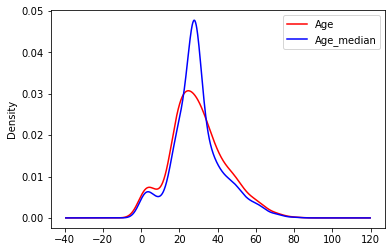

In [69]:
variable='Age'
median=df[variable].median()
cent_tend=('median',median)
impute_nan(df,variable,cent_tend)

Using mode
14.526497332334044  to  14.526497332334044


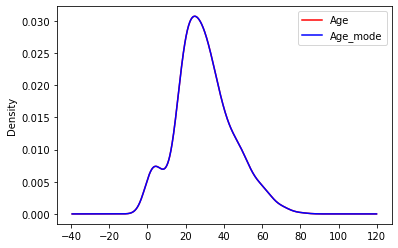

In [70]:
mode=df[variable].mode()
cent_tend=('mode',mode)
impute_nan(df,variable,cent_tend)

Therefore mode is favourable for categorical feature imputations. Mean and Median for discrete continuous.

Using mean
14.526497332334044  to  13.002015226002884


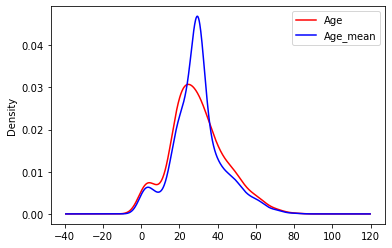

In [71]:
mean=df[variable].mean()
cent_tend=('mean',mean)
impute_nan(df,variable,cent_tend)

Therefore mean can be used to impute nan.
Leads to distortion in the variance of the dataset.
But it is easy to generate complete dataset without being affected much by outliers.

### 2. Random Sample Imputation
Assumption- MCAR
Replacing NaN with random values from the dataset.

In [72]:
df.head()

,Survived,Age,Fare,Age_median,Age_mode,Age_mean
0,0,22.0,7.2500,22.0,22.0,22.0
1,1,38.0,71.2833,38.0,38.0,38.0
2,1,26.0,7.9250,26.0,26.0,26.0
3,1,35.0,53.1000,35.0,35.0,35.0
4,0,35.0,8.0500,35.0,35.0,35.0


In [75]:
df[variable].isnull().sum()

177

In [88]:
def impute_nan_random(df,variable):
    df[variable+"_random"]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+"_random"]=random_sample
    
    fig=plt.figure()
    ax=fig.add_subplot(111)
    df[variable].plot(kind='kde',ax=ax,color='red')
    df[variable+"_random"].plot(kind='kde',ax=ax,color='blue')
    lines,labels=ax.get_legend_handles_labels()
    ax.legend(lines,labels,loc='best')

,Survived,Age,Fare,Age_median,Age_mode,Age_mean,Age_random
0,0,22.0,7.2500,22.0,22.0,22.0,22.0
1,1,38.0,71.2833,38.0,38.0,38.0,38.0
2,1,26.0,7.9250,26.0,26.0,26.0,26.0
3,1,35.0,53.1000,35.0,35.0,35.0,35.0
4,0,35.0,8.0500,35.0,35.0,35.0,35.0


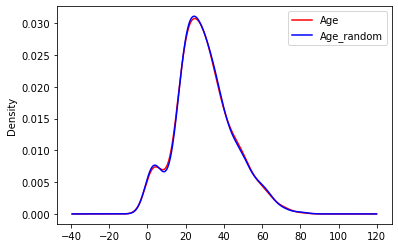

In [89]:
impute_nan_random(df,variable)
df.head()

No distortion in varaince of the distribution. But Randomness doesn't work in each and every scenario.

### 3. Capturing NaN values with a new feature
Assumption- MNAR

In [98]:
df[variable+"_updated"]=df[variable]
df[variable+"_capture"]=np.where(df[variable].isnull(),1,0)
df[variable+"_updated"].fillna(df[variable].median(),inplace=True)
df.head(10)

,Survived,Age,Fare,Age_median,Age_mode,Age_mean,Age_random,Age_capture,Age_updated
0,0,22.0,7.2500,22.0,22.0,22.000000,22.0,0,22.0
1,1,38.0,71.2833,38.0,38.0,38.000000,38.0,0,38.0
2,1,26.0,7.9250,26.0,26.0,26.000000,26.0,0,26.0
3,1,35.0,53.1000,35.0,35.0,35.000000,35.0,0,35.0
4,0,35.0,8.0500,35.0,35.0,35.000000,35.0,0,35.0
5,0,NaN,8.4583,28.0,NaN,29.699118,28.0,1,28.0
6,0,54.0,51.8625,54.0,54.0,54.000000,54.0,0,54.0
7,0,2.0,21.0750,2.0,2.0,2.000000,2.0,0,2.0
8,1,27.0,11.1333,27.0,27.0,27.000000,27.0,0,27.0
9,1,14.0,30.0708,14.0,14.0,14.000000,14.0,0,14.0


In the above code we kept a seperate variable denoting that at that particular index the value was missing. So during model creation any correlation related to missing value will be accounted for.

Additional features are created for many missing value features=>Curse of dimensionality

### 4. End of Distribution Imputation
Replace NaN values with 3rd SD Value of the normal distribution. 

In [113]:
def impute_nan_end(df,variable,extreme):
    df[variable+"_updated2"]=df[variable]
    df[variable+"_end_dist"]=df[variable]
    df[variable+"_updated2"].fillna(df[variable].median(),inplace=True)
    df[variable+"_end_dist"].fillna(extreme,inplace=True)

73.27860964406095


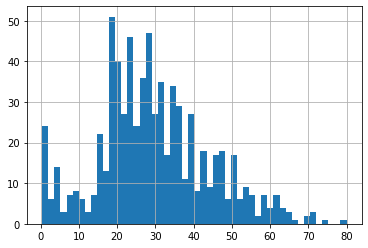

In [114]:
extreme=df[variable].mean()+3*df[variable].std()
df[variable].hist(bins=50)
print(extreme)

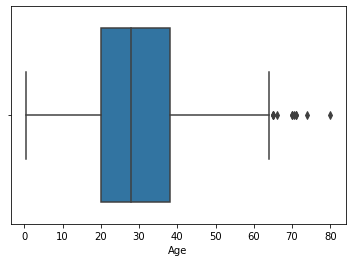

In [115]:
import seaborn as sns
sns.boxplot(df[variable])

In [116]:
impute_nan_end(df,variable,extreme)

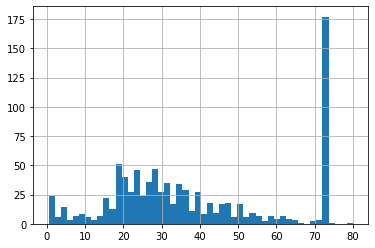

In [117]:
df[variable+"_end_dist"].hist(bins=50)

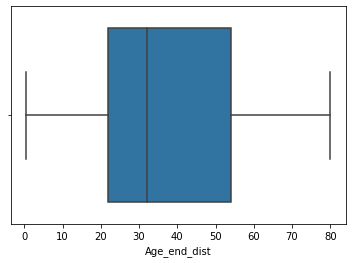

In [118]:
sns.boxplot(df[variable+"_end_dist"])

Outliers are captured in this method and reduced. Captures importance of missingness.
Disadv- Distorts the distribution.

### 5. Arbitrary Value Imputation

Not much useful

## Handling Categorical Missing Values

In [4]:
df=pd.read_csv('AdvHousePrice_train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [6]:
df.shape

(1460, 4)

In [5]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [8]:
df.isnull().mean().sort_values(ascending=False)

FireplaceQu    0.472603
GarageType     0.055479
BsmtQual       0.025342
SalePrice      0.000000
dtype: float64

### 1. Frequent Category Imputation

BsmtQual is having less number of missig values. Therefore replacing Nan with most frequent category would not affect the distribution and predicition much.

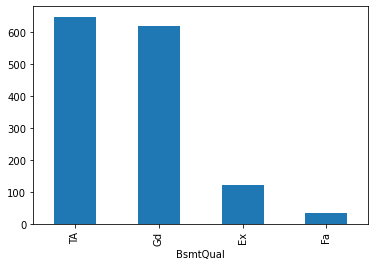

In [14]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

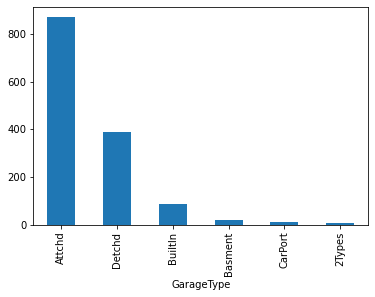

In [15]:
df.groupby(['GarageType'])['GarageType'].count().sort_values(ascending=False).plot.bar()

In [16]:
def impute_nan_freq(df,variable):
    freq=df[variable].mode()[0]
    df[variable].fillna(freq,inplace=True)

In [17]:
for feature in df.columns:
    impute_nan_freq(df,feature)

In [18]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


Adv-
1. Easy and Fast to implement

Disadv-
1. Since we are using the more frequent labels, it will be represented more if number of Nan is high. relationship with target variable is distorted.

#### Adding Variable to  Capture NaN

In [26]:
df=pd.read_csv('AdvHousePrice_train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [27]:
df.isnull().mean().sort_values(ascending=False)

FireplaceQu    0.472603
GarageType     0.055479
BsmtQual       0.025342
SalePrice      0.000000
dtype: float64

In [28]:
def impute_nan_freq_var(df,variable):
    df[variable+"_var"]=np.where(df[variable].isnull(),1,0)
    freq=df[variable].mode()[0]
    df[variable].fillna(freq,inplace=True)

In [31]:
for feature in df.columns:
    if feature != 'SalePrice':
        impute_nan_freq_var(df,feature)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var,GarageType_var
0,Gd,Gd,Attchd,208500,0,1,0
1,Gd,TA,Attchd,181500,0,0,0
2,Gd,TA,Attchd,223500,0,0,0
3,TA,Gd,Detchd,140000,0,0,0
4,Gd,TA,Attchd,250000,0,0,0


Reduces overepresentation in case number of Nan is high.

### 2. Using NaN as a different category
In case number of NaN is very high

In [38]:
df=pd.read_csv('AdvHousePrice_train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [39]:
def impute_nan_new_cat(df,variable):
    df[variable]=np.where(df[variable].isnull(),"Missing",df[variable])

In [40]:
for feature in df.columns:
    if feature != 'SalePrice':
        impute_nan_new_cat(df,feature)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Missing,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


### 3. KNN Imputation

In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

In [19]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Sex','Embarked','Survived'])
df.head()

,Survived,Sex,Age,Fare,Embarked
0,0,male,22.0,7.2500,S
1,1,female,38.0,71.2833,C
2,1,female,26.0,7.9250,S
3,1,female,35.0,53.1000,S
4,0,male,35.0,8.0500,S


In [20]:
df.isnull().sum()

Survived      0
Sex           0
Age         177
Fare          0
Embarked      2
dtype: int64

In [21]:
cat_variables = df[['Sex', 'Embarked']]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
cat_dummies.head()

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [22]:
df.drop(['Sex','Embarked'],axis=1,inplace=True)
df=pd.concat([df,cat_dummies],axis=1)
df.head()

,Survived,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,7.2500,1,0,1
1,1,38.0,71.2833,0,0,0
2,1,26.0,7.9250,0,0,1
3,1,35.0,53.1000,0,0,1
4,0,35.0,8.0500,1,0,1


In [23]:
scaler=MinMaxScaler()
df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df.head()

,Survived,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,0.271174,0.014151,1.0,0.0,1.0
1,1.0,0.472229,0.139136,0.0,0.0,0.0
2,1.0,0.321438,0.015469,0.0,0.0,1.0
3,1.0,0.434531,0.103644,0.0,0.0,1.0
4,0.0,0.434531,0.015713,1.0,0.0,1.0


In [24]:
imputer=KNNImputer(n_neighbors=5)
df=pd.DataFrame(imputer.fit_transform(df),columns=df.columns)
df.head()

,Survived,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,0.271174,0.014151,1.0,0.0,1.0
1,1.0,0.472229,0.139136,0.0,0.0,0.0
2,1.0,0.321438,0.015469,0.0,0.0,1.0
3,1.0,0.434531,0.103644,0.0,0.0,1.0
4,0.0,0.434531,0.015713,1.0,0.0,1.0


In [25]:
df.isnull().sum()

Survived      0
Age           0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64